In [ ]:
import pandas as pd

### Explore the inventory data

In [ ]:
inventory.columns

In [ ]:
# Get the different locations where the equipment may be stored
inventory['Lugar de almacenamiento'].unique()
inventory['Días de almacenamiento '].unique()
inventory['GRUPO '].unique()

In [ ]:
# Remove the space at the end of the 'Lugar de almacenamiento' value 
inventory['Lugar de almacenamiento'] = inventory['Lugar de almacenamiento'].str.rstrip()

In [ ]:
# Check the values without the space at the end
inventory['Lugar de almacenamiento'].unique()

In [ ]:
lista1 = [{'gg':1}, {'hh':2}, {'jj':3}, {'oo':4}, {'yy':5}]
lista2 = ['a', 'b', 'c']

for elemento1, elemento2 in zip(lista1, lista2):
    print(elemento1, elemento2)

In [ ]:
lista_intercalada = list(zip(lista1, lista2))
print(lista_intercalada)

In [ ]:
import itertools
lista_intercalada = list(itertools.zip_longest(lista1, lista2))
print(lista_intercalada)

In [ ]:
for slot in lista_intercalada:
    print(slot)

In [ ]:
import pandas as pd

# create two dataframes with identical columns
df1 = pd.DataFrame({'A': [1, 3, 5,88], 'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11], 'B': [8, 10, 12]})

# concatenate the two dataframes vertically with keys
result = pd.concat([df1, df2], keys=['df1', 'df2'])

# reset the index to remove the multi-index
#result.reset_index(level=1, drop=True, inplace=True)

print(result)

In [ ]:
# Read the dataset
inventory = pd.read_excel("inputs/Equipos.xlsx")

In [ ]:
sample = inventory.iloc[0,:]

In [ ]:
from datetime import datetime

# get current date and time
current_date_time = datetime.now()

# create a Pandas timestamp from the current date and time
current_timestamp = pd.Timestamp(current_date_time)

# create another Pandas timestamp for a specified date and time
specified_timestamp = sample['Salida']

# calculate the number of days between the two timestamps
num_days = (current_timestamp - specified_timestamp).days

print(f"Number of days between {current_timestamp} and {specified_timestamp}: {num_days}")


In [ ]:
df1 = {'A': [1, 3, 5,88], 'B': [2, 4, 6]}
s = ''
for key in df1:
    s += key + ':' + str(df1[key]) + ' '
print(str(s))

The best degree is 10


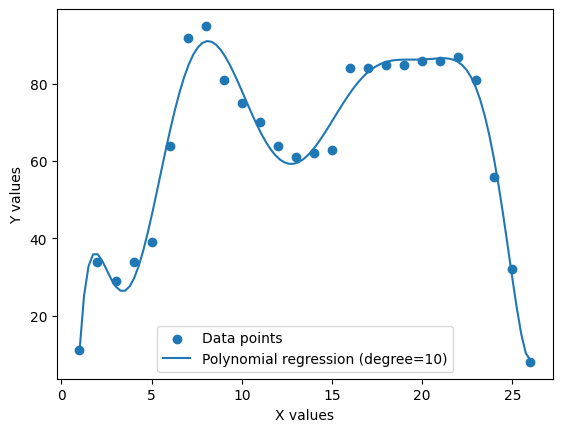

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom estimator class that wraps numpy.poly1d
class PolyRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1):
        self.degree = degree

    def fit(self, X, y=None):
        self.coeffs = np.polyfit(X.squeeze(), y, self.degree)
        return self

    def predict(self, X):
        return np.polyval(self.coeffs, X.squeeze())

# Define your data points
y = np.array([11, 34, 29, 34, 39, 64, 92, 95, 81, 75, 70, 64, 61, 62, 63, 84, 84, 85, 85, 86, 86, 87, 81, 56, 32, 8])

# Create x as a range of integers from 1 to 26
x = np.arange(1, 27)

# Set the maximum degree of the polynomial
max_degree = 10

# Initialize lists to store the cross-validation scores and the degree values
cv_scores = []
degrees = np.arange(1, max_degree+1)

# Loop over the degree values and calculate the cross-validation scores for each degree
for degree in degrees:
    # Create a PolyRegressor object with the current degree
    model = PolyRegressor(degree=degree)

    # Calculate the cross-validation score for this degree
    cv_score = np.mean(cross_val_score(model, x.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

# Find the degree with the best cross-validation score
best_degree = degrees[np.argmin(cv_scores)]

# Print the best degree
print(f"The best degree is {best_degree}")

# Fit a polynomial regression with the best degree to the data points
model = PolyRegressor(degree=best_degree)
model.fit(x.reshape(-1, 1), y)

# Generate x-values to plot the regression line
x_values = np.linspace(1, x[-1], 100)

# Calculate the y-values of the regression line
y_values = model.predict(x_values.reshape(-1, 1))

# Plot the data points and the regression line
plt.scatter(x, y, label='Data points')
plt.plot(x_values, y_values, label=f"Polynomial regression (degree={best_degree})")

# Add a legend and axis labels
plt.legend()
plt.xlabel('X values')
plt.ylabel('Y values')

# Show the plot
plt.show()


In [4]:
lista = [3,2,5,1]

for j in range(0,len(lista)-1):
    for i in range(0,len(lista)-1):
        l1 = lista[i]
        l2 = lista[i+1]

        if(l1 > l2):
            lista[i+1] = l1
            lista[i] = l2

print(lista)


[1, 2, 3, 5]


In [8]:
lista = [{"dd":12,"mm":10,"yy":2000,"money":3000,"name":"Cirito"},{"dd":3,"mm":2,"yy":1895,"money":5000},{"dd":4,"mm":8,"yy":1895,"name":"Sofi"},{"dd":21,"mm":10,"yy":2000,"category":"sapee"}]

for j in range(0,len(lista)-1):
    for i in range(0,len(lista)-1):
        l1 = lista[i]
        l2 = lista[i+1]

        swap = False

        # Comparar años
        if(l1["yy"] > l2["yy"]):
            swap = True

        elif(l1["yy"] == l2["yy"]):
            # Comparar meses
            if(l1["mm"] > l2["mm"]):
                swap = True

            elif(l1["mm"] == l2["mm"]):
                # Comparar días
                if(l1["dd"] > l2["dd"]):
                    swap = True
        
        if(swap == True):
            lista[i+1] = l1
            lista[i] = l2

print(lista)


[{'dd': 3, 'mm': 2, 'yy': 1895, 'money': 5000}, {'dd': 4, 'mm': 8, 'yy': 1895, 'name': 'Sofi'}, {'dd': 12, 'mm': 10, 'yy': 2000, 'money': 3000, 'name': 'Cirito'}, {'dd': 21, 'mm': 10, 'yy': 2000, 'category': 'sapee'}]
